# Naive Bayes
* grounded in probability, which can be powerful
* we will purposefully make this model not powerful ("naive")

## Example
* We want to determine if an email is spam
* can look at words like "free", "pills", "money", etc
* we want to find: 
### $$p("money"|\;spam)$$
### $$p("money"|\;not\;spam)$$

# How do we find the above probabilities?
* **discrete probabilities are just counts** (we will look at a slightly more complex situation after)
* hence: 
### $$p("money"|\;spam) = \frac{count \; or \; number \;of \;spam \; messages\;containing\;"money"}{total \;number\;or \;count \;of\;spam\;messages}$$
* A similar thing will be done for 
### $$p("money"|\;not\;spam)$$

# What makes this naive?
* consider the following:
### $$p("cash"|\;spam)$$
* Is it correlated with $p("money"|\;spam)$?
* It most likely is very correlated! 
* however, naive bayes makes the assumption that none of the input features are correlated, and that they are all independent
### $$p("money","cash"|\;spam)= p("money"|\;spam)p("cash"|\;spam)$$
which generalizes to:
### $$p(all \;words | \; spam) = p(word1 \;|\; spam)p(word2\;|\;spam)...$$

# What makes Naive Bayes, Bayesian?
* think about what we are interested in doing here
* we don't just want the model probabilities p(X|spam), we want to make a prediction! We want: p(spam|X)
* In other words, we want to know the probability that a document is spam, given the words in a document!
* This is just the reverse of what we have been modeling so far, which is just p(words|spam)
* That is fine, because we can just use...**Bayes Rule**
### $$P(spam|X) = \frac{P(X|spam)p(spam)}{P(X)}$$
* where in the above equation, X is the list of words in the document
* We classify based on which of the following are bigger:
    * p(spam|X)
    * p(not spam|X)
* if p(spam|X) > p(not spam|X), we classify as spam
* if p(not spam|X) > p(spam|X), we classify as not spam
* In other words we are taking the argmax of these two probabilties 
### $$Y = argmax_C \Big(p(C|X)\Big) = argmax_C\Big(p(X|C)p(C)\Big)$$
* notice that p(X) = p(words) does not depend on spam or not spam
* in this case, C is equal to spam or not spam
### P(C) = class prior
* again, this can be found just by counting! Because it is a discrete probability 
* example: if you have 10 spam emails and 20 non spam emails in your data set, then p(spam) = p(c) = 1/3, and p(not spam) = p(c) = 2/3
### P(X | C) = likelihood
### P(C | X) = posterior


# How do we model P(X | C), the likelihood? 
* remember, naive bayes means that all of the words, given the class, are independent
### $$p(document \;containing "free", "money", "cash",... | \; C) = p("free" \;|\; C)p("money"\;|\;C)...$$
* when you have independent probabilties, that means you can just multiply each of the individual probabilities together to get the joint probabilty 
* so since:
### $$P(X\;|\;C)=P(words\;|\;C)$$
* and because we just mentioned how all words are independent, then we can write:

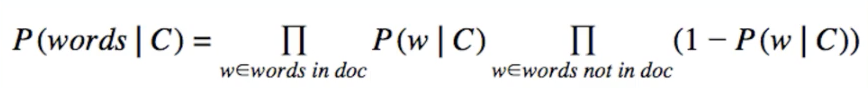

* so, as seen above, the probabilities of seeing a certain list of words, given the class either spam or not spam, is just the product of all the individual words given the class
* note that you also need to account for any word that doesn't appear as well
* that is just 1 - the probability of it appearing

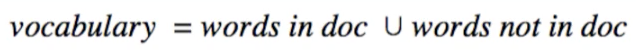

* why do we need to account for the probability that the words does not appear? Well think back maximizing the likelihood of a binomial experiment
* The general form equation for the likelihood of a binomial experiment is:
### $$L(X|p) = p^k*(1-p)^{N-k}$$

# Naive Bayes vs. KNN
* conceptually speaking, this is almost the opposite of what we did for KNN
* with KNN we are essentially trying to approximate a function that takes in some input, and produces a target label.
    * f(words in document) -> spam/not spam
* With Naive bayes, we are assuming that all of the data we observe is produced from the target label so that all we need to do is model the distribution of the data, given all of the different target labels
    * spam -> a spammy document -> model p(document | spam)
    * not spam -> a non-spammy document -> model p (document | not spam)
* we will discuss this idea in more detail when we look into **generative** vs **discriminative** classifiers


# Naive Bayes Implementation 
* we are again going to use the MNIST dataset
* Data: discrete distribution, each pixel has 256 different values
* in physical reality: we consider light to be more or less continuous 
* so, we are probably better off treating it as a continuous distribution 
* but which continuous distribution should we choose? 
* We could use a distribution that is defined from 0-1 (since we already divided by 255)
* but instead we are going to use a gaussian distribution!

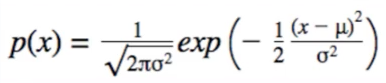

* recall that there is also the multivariate gaussian distribution where x and $\mu$ are vectors, and instead of the variance we use covariance

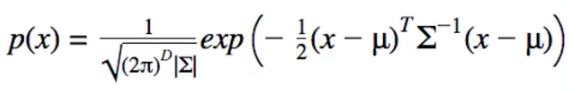

* x = vector input
* $\mu$ = vector mean
* $\Sigma$ = covariance matrix
* Scipy library can calculate this directly
* This is much better than doing it manually, since scipy is otpimized to do it fast

## Further Optimizations
### 1) We won't use full covariance matrix
* This is because Naive bayes treats all dimensions as independent, even though they are not
* In terms of the multivariate gaussian, that means that all of the off diagonals in the covariance matrix are 0
### $$Cov(i,j) = E[(x_i-\mu_i)(x_j-\mu_j)]$$
* the above equation equals 0 if $x_i$ is independent of $x_j$
### $$Cov(i, i) = \Sigma_{ii} = var(x_i) = \sigma_i^2$$
* this means that instead of needing a DxD covariance matrix, we only need D different single dimension variances (so we can just store a D sized vector) 
* this is called an axis aligned elliptical covariance
* This speeds up the calculation a lot, because we don't need to invert the covariance matrix
* recall that in order to invert a diagonal matrix, all we need to do is take 1 over all of the individual values
### $$(\Sigma^{-1})_{ii}= \frac{1}{\sigma_i^2}$$
* luckily, scipys library function allows us to pass in either a DxD covariance matrix, or a D sized vector in place of it!
* effectively that means we are still doing:
### $$p(X|C) = p(pixel_1\;|\;C)p(pixel_2\;|\;C)...p(pixel_{784}\;|\;C)$$
* which equals..
### $$N(x_1; \mu_1, \sigma_1^2)N(x_2; \mu_2, \sigma_2^2)...N(x_{784}; \mu_{784}, \sigma_{784}^2)$$

### 2) Log Probabilities
* we do not need to use direct probabilities
* calculating the exponential function in code is time consuming, as is multiplication
* by calculating the log probabilities instead, we can bring everything inside of the exponential down, and turn all of the multiplications into additions
### $$Prediction = argmax_C \Big(P(X|C)P(C)\Big) = argmax_C \Big(logP(X|C)+ logP(C)\Big) $$
* scipy has a function for the log pdf of a gaussian as well!

### 3) Smoothing
* what happens when you try to invert the covariance matrix sometimes, is that you can come across a problem called the singular covariance problem 
* That is them matrix equivalent of dividing by 0
* To prevent this we add the identity matrix multiplied by a small number, like 10^-3, to the raw covariance matrix
* So it would go from, maximum likelihood estimate:
### $$\Sigma = \frac{(X-\mu)^T(X-\mu)}{N-1}$$
* to the smoothed estimate:
### $$\Sigma = \frac{(X-\mu)^T(X-\mu)}{N-1}+ \lambda*I$$
* where lambda is a small number like 10^-3
* and I is the indentity matrix

# Pseudocode
## Fit
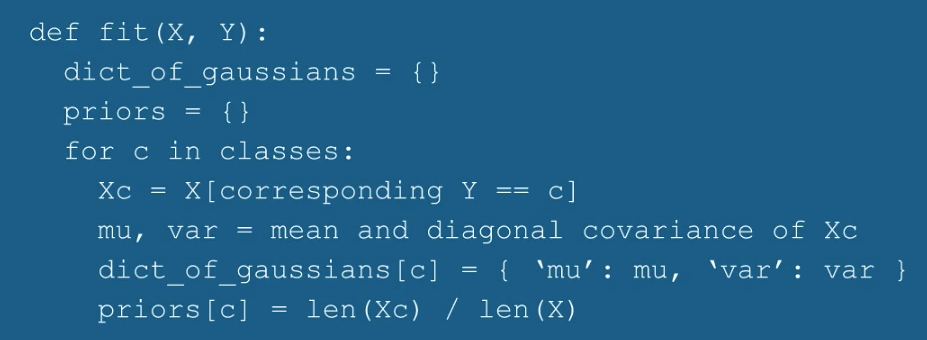

* in our fit function above, what we want to do is calculate the mean and covariance for each class 
* the mean and the covariance are all that we need to fully represent the gaussian distribution
    * They are what we call **sufficient statistics**
* we also need to calculate the priors here

## Predict

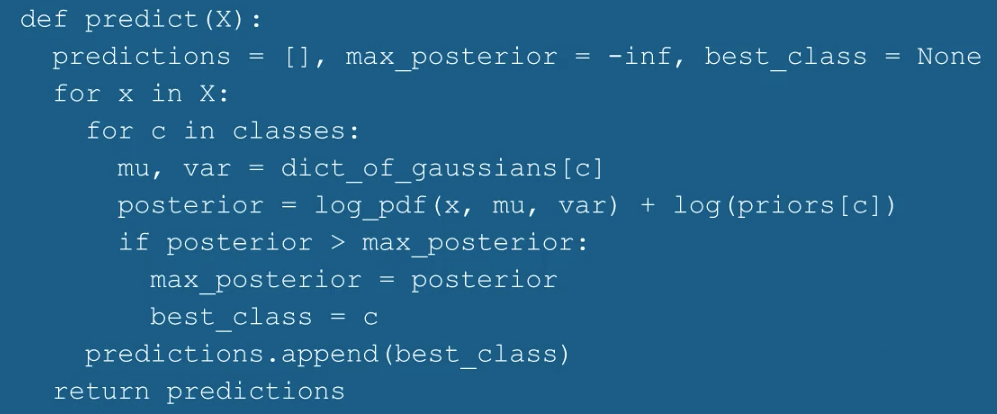

* in the predict function, we want to loop through every sample that we want to predict on, and then loop through each class
* for each class, we get the mean, variance, and prior
* we use the mean and variance to calculate the log pdf for this sample being in this class
* we add that to the log of the prior to get the posterior
* if this is better than the maximum posterior we have found so far, we set this to our best current prediction

# Naive Bayes Handwritten Example
* lets again use the spam classifier examples
* in order to keep this manageable by hand, lets only look at 3 words: "money", "free", and "pills"
* so, we have a set of data points, which tells use whether or not each of these data points appears, and whether or not that point is spam 

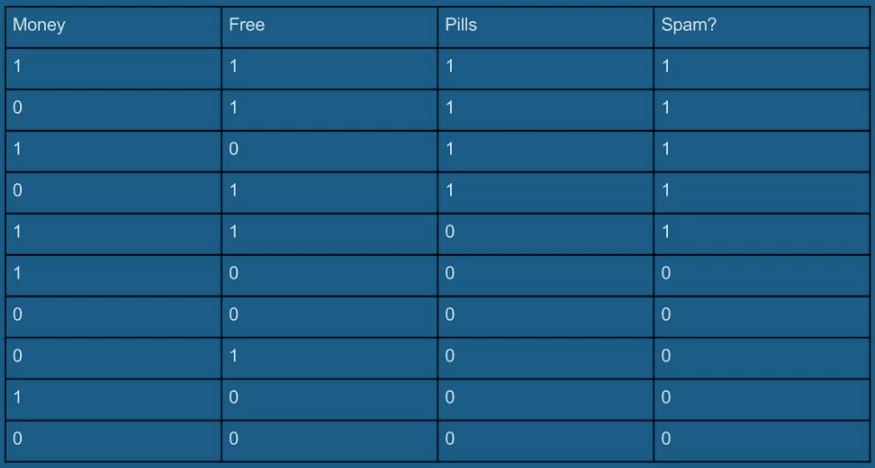

* remember of our goal is to calculate P(C|X), in other words, P(spam | words) and P(not spam | words)
* we do not need P(X)

## Required probabilities
* in this case, the symbol '~' means **not**

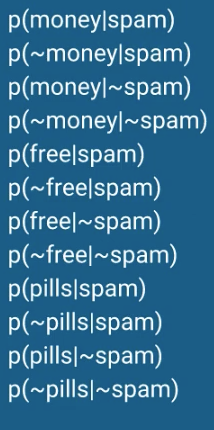

* and here are there values:

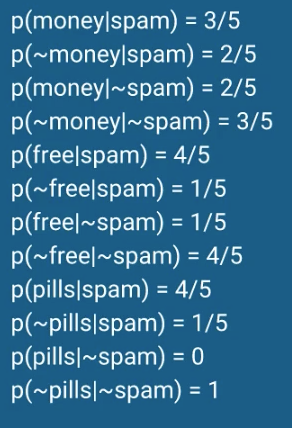

## Example Calculation
* Now lets do an example calculation for classifying a spam message
* Input: suppose an email contains the word "money", but not "free" or "pills"
* is it spam?
* we need to calculate the probability: p(spam | money, ~free, ~pills) and p(~spam | money, ~free, ~pills)
* so both of these probabilities we can separate into distinct terms since they are all independent

### P(spam| money, ~free, ~pills)

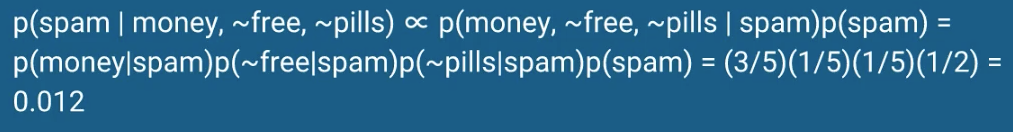

### P(~spam| money, ~free, ~pills)

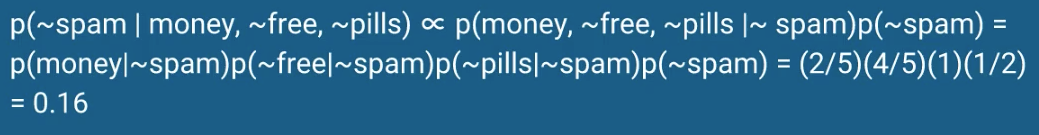

## Final Answer - NOT spam
* we can see that the not spame posterior is higher, so we classify this as not spam
* also, these are not *true* probabilties since we did not divide by p(X)

# 0 probabilities 
* note that probabilities that are exactly equal to 0 can be problematic
* because everything gets multiplied, all it takes is 1 zero to make everything zero
* can end up with a tie of all zeros
* solution: sometimes we use add-one smoothing/ laplace smoothing
* instead of the pure count, we add 1 to the numerator and V to the denominator
* where V = vocabulary size to ensure valid probability (adds up to 1)

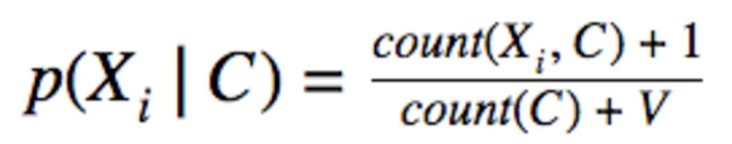

---
# Naive Bayes in Code
* Lets code Naive Bayes and use it on the MNIST problem

In [45]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm # used to get single dimension gaussians
from scipy.stats import multivariate_normal as mvn # also can use multivariate normal

def get_data(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('data/train.csv')
    data = df.as_matrix()
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

## Create Naive Bayes Class
* needs fit and train functions

In [53]:
class NaiveBayes(object):
    
    def fit(self, X, Y, smoothing=10e-3):    # takes in X, Y, and smoothing parameter
        self.gaussians = dict()    # create an empty dictionary of the gaussian parameters 
        self.priors = dict()       # and an empty dictionary of the priors
        labels = set(Y)            # grabs all unique values in Y
        
        for c in labels:           # loop through each of the labels (1,2,3,...,9)
            current_x = X[Y == c]  # set current_x to be that for which X has a label of c, 
                                   # ex. grabbing ALL training examples where y is 5
            
            self.gaussians[c] = {                          # at this point, current_x contains all training examples 
                'mean': current_x.mean(axis=0),            # associated with specific class label. Now, we find the 
                'var': current_x.var(axis=0) + smoothing   # mean and variance of each pixel (784 total). Aka we are  
            }                                              # are finding this so that we can determine the likelihood
                                                           # of observing certain values for the pixels, given a class label
            
            self.priors[c] = float(len(Y[Y == c])) / len(Y)  # calculate prior for each class 
                                                             # # of images for class / total # of images
        
    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)
    
    def predict(self, X): 
        N, D = X.shape
        K = len(self.gaussians)        # setting K = number of classes
        P = np.zeros((N,K))            # each prediction is a vector. Each class gets a probability, and the 
                                       # highest probability is chosen
        
        for c, g in self.gaussians.items():     # loop through all of the gaussians
            mean, var = g['mean'], g['var']         # get mean and variance for each gaussian
            
            P[:, c] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c]) # calculate N different log 
                                                                                 # pdfs at same time
        
        return np.argmax(P, axis=1)
        
if __name__ == '__main__':
    X, Y = get_data(10000)
    Ntrain = int(len(Y) / 2)
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    
    nb = NaiveBayes()
    nb.fit(Xtrain, Ytrain)
    
    
    # set timer to see how long it takes model to fit the training data
    t0 = datetime.now()
    nb.fit(Xtrain, Ytrain)
    print ("Training Time: ", (datetime.now() - t0))

    # now get training accuracy and time this as well
    t0 = datetime.now()
    print ("Train accuracy:", nb.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

    # now print test accuracy
    t0 = datetime.now()
    print ("Test accuracy:", nb.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))
    print('-----------------------------------------------------------------------')
        

Reading in and transforming data...
Training Time:  0:00:00.030623
Train accuracy: 0.8134
Time to compute train accuracy: 0:00:01.405265 Train size: 5000
Test accuracy: 0.7962
Time to compute test accuracy: 0:00:01.358634 Test size: 5000
-----------------------------------------------------------------------


In [54]:
X, Y = get_data()

Reading in and transforming data...


In [59]:
current_x = X[Y==5]
current_x.shape

(3795, 784)

In [66]:
current_x.mean(axis=0).shape

(784,)

In [69]:
Xtest.shape

(5000, 784)

(784,)